In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, Activation

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
# CNN from the paper 
# I put the size filters of my choice, and for pooling as well 

inp = Input(shape=input_shape)
conv1 = Conv2D(32, (3,3),activation='relu')(inp)
max_pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(32, (3,3),activation='relu')(max_pool1)
max_pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat =  Flatten()(max_pool2)
dense1 = Dense(128,activation="relu")(flat)
predictions = Dense(10,activation="softmax")(dense1) # softmax layer 
model = Model(inputs=[inp], outputs=[predictions])



In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, epochs=10, validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 52s 864us/step - loss: 0.0777 - accuracy: 0.9759 - val_loss: 0.0439 - val_accuracy: 0.9853
Epoch 2/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0415 - accuracy: 0.9868 - val_loss: 0.0334 - val_accuracy: 0.9881
Epoch 3/10
60000/60000 [==============================] - 48s 794us/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0352 - val_accuracy: 0.9881
Epoch 4/10
60000/60000 [==============================] - 47s 790us/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0305 - val_accuracy: 0.9905
Epoch 5/10
60000/60000 [==============================] - 47s 781us/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0264 - val_accuracy: 0.9914
Epoch 6/10
60000/60000 [==============================] - 48s 804us/step - loss: 0.0135 - accuracy: 0.9958 - val_loss: 0.0276 - val_accuracy: 0.9914
Epoch 7/10
60000/60000 [==============================] 

In [18]:
#model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 239us/step


[0.03360305172635708, 0.9902999997138977]

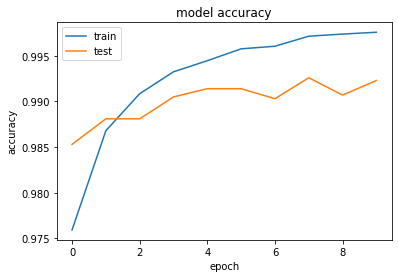

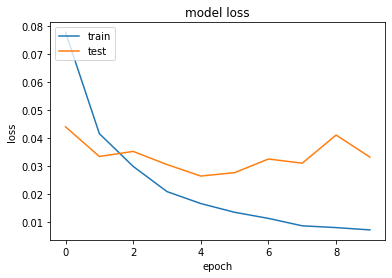

In [13]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()